## World Happiness Report - 2021 Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
 df = pd.read_csv("2021.csv")

In [3]:
df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df.shape

(149, 20)

In [4]:

df.rename({"Ladder score":"Happiness score"},axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Happiness score                             149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

#### Now we will extract important colums only

In [6]:
df = df[["Country name","Happiness score","Regional indicator","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]]

In [7]:
df.head()

,Country name,Happiness score,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.842,Western Europe,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,Western Europe,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,7.571,Western Europe,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,7.554,Western Europe,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,7.464,Western Europe,10.932,0.942,72.4,0.913,0.175,0.338


In [8]:
df.isnull().sum()

Country name                    0
Happiness score                 0
Regional indicator              0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

<AxesSubplot:title={'center':'GDP per capita vs Happiness score'}, xlabel='Happiness score', ylabel='Logged GDP per capita'>

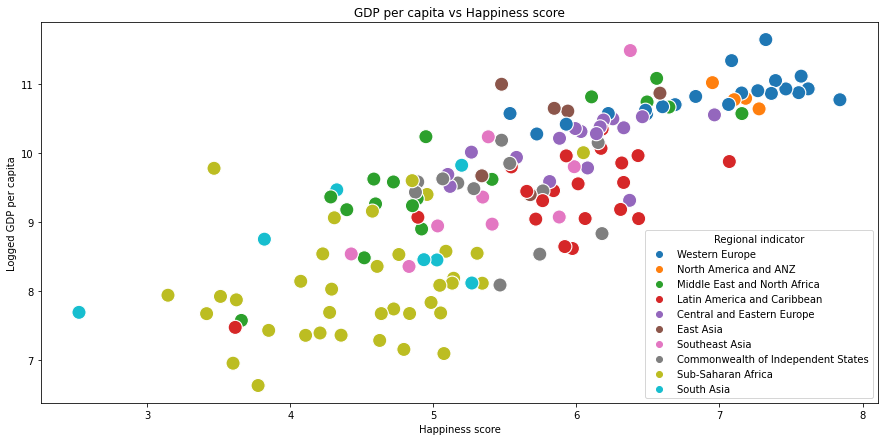

In [9]:
plt.figure(figsize=(15,7))
plt.title("GDP per capita vs Happiness score")
sns.scatterplot(x="Happiness score",y="Logged GDP per capita",data=df,hue="Regional indicator",s=200)

#### Total No. of countries based on regional indicator

In [10]:
print(df.groupby("Regional indicator")["Country name"].count())

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: Country name, dtype: int64


###### So maximum numbers of country are there in Sub-Saharan Africa

#####   . 

<AxesSubplot:>

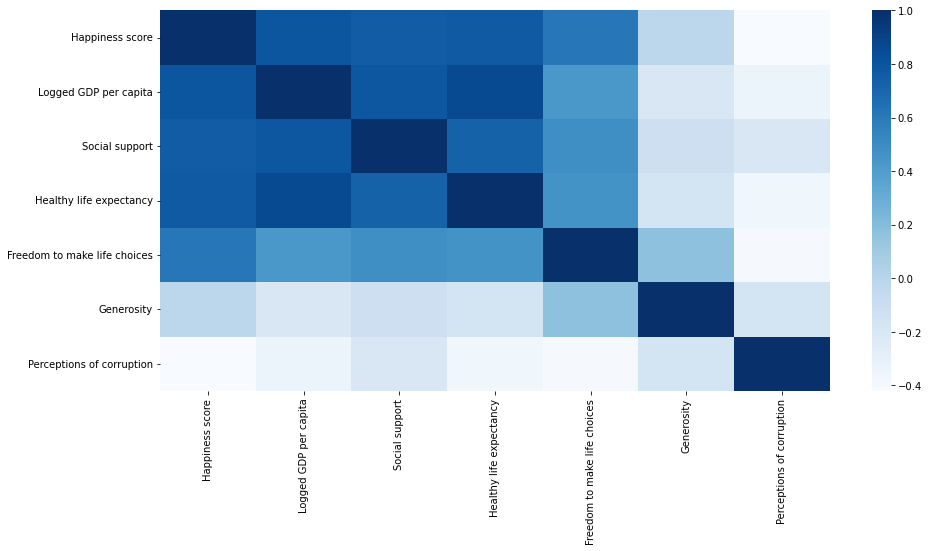

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap="Blues")

### Corruption Analysis in different countries

In [12]:
df_new= df["Perceptions of corruption"].groupby(df["Regional indicator"]).mean().sort_values()
df_new = pd.DataFrame(df_new)

In [13]:
df_new

,Perceptions of corruption
Regional indicator,
North America and ANZ,0.449250
Western Europe,0.523095
East Asia,0.683333
Southeast Asia,0.709111
Commonwealth of Independent States,0.725083
Middle East and North Africa,0.762235
Sub-Saharan Africa,0.765944
Latin America and Caribbean,0.792600
South Asia,0.797429


<AxesSubplot:title={'center':'Perception of corruptions in various regions'}, xlabel='Regional indicator', ylabel='Perceptions of corruption'>

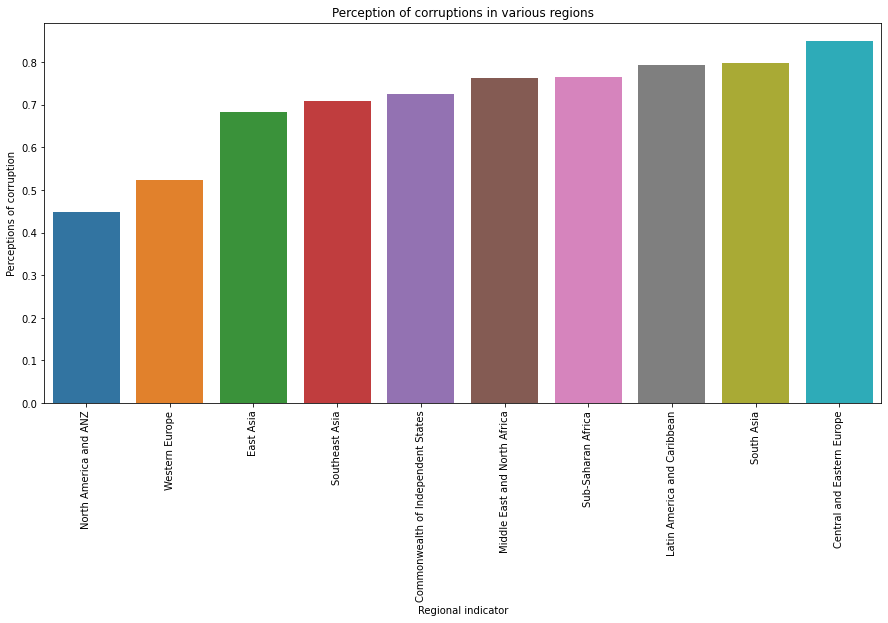

In [14]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.title("Perception of corruptions in various regions")
sns.barplot(x=df_new.index,y="Perceptions of corruption",data= df_new)

In [15]:
most_corrupted_country = df['Country name'][df["Perceptions of corruption"]==max(df["Perceptions of corruption"])]
print("Country which has maximum perception of corruption  : ", most_corrupted_country[59])

Country which has maximum perception of corruption  :  Croatia


#### Top 10 countries with maximum perception of corruption

In [16]:
df_most_corrupt = df.sort_values(by=["Perceptions of corruption"],ascending=False,ignore_index=True)[0:10]
df_most_corrupt["Country name"]

0                   Croatia
1                   Romania
2                  Bulgaria
3    Bosnia and Herzegovina
4               Afghanistan
5                   Ukraine
6                   Moldova
7                    Kosovo
8                   Lesotho
9                  Slovakia
Name: Country name, dtype: object

<AxesSubplot:title={'center':'Countries with Maximum Preception of Corruption'}, xlabel='Country name', ylabel='Perceptions of corruption'>

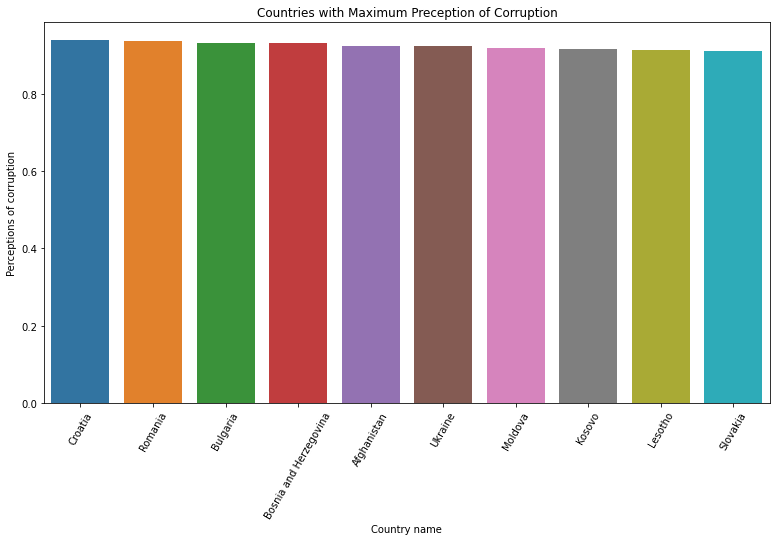

In [17]:
plt.figure(figsize=(13,7))
plt.title("Countries with Maximum Preception of Corruption")
plt.xticks(rotation=60)
sns.barplot(x="Country name",y="Perceptions of corruption",data=df_most_corrupt)

In [18]:
least_corrupted_country = df['Country name'][df["Perceptions of corruption"]==min(df["Perceptions of corruption"])]
print("Country which has miniimum perception of corruption  : ", least_corrupted_country[31])

Country which has miniimum perception of corruption  :  Singapore


##### Top 10countries with minimum perception of corruption

In [19]:
df_least_corrupt = df.sort_values(by=["Perceptions of corruption"],ignore_index=True)[0:10]
df_least_corrupt["Country name"]

0      Singapore
1         Rwanda
2        Denmark
3        Finland
4         Sweden
5    New Zealand
6         Norway
7    Switzerland
8    Netherlands
9        Ireland
Name: Country name, dtype: object

<AxesSubplot:title={'center':'Countries with minimum perception of corruption'}, xlabel='Country name', ylabel='Perceptions of corruption'>

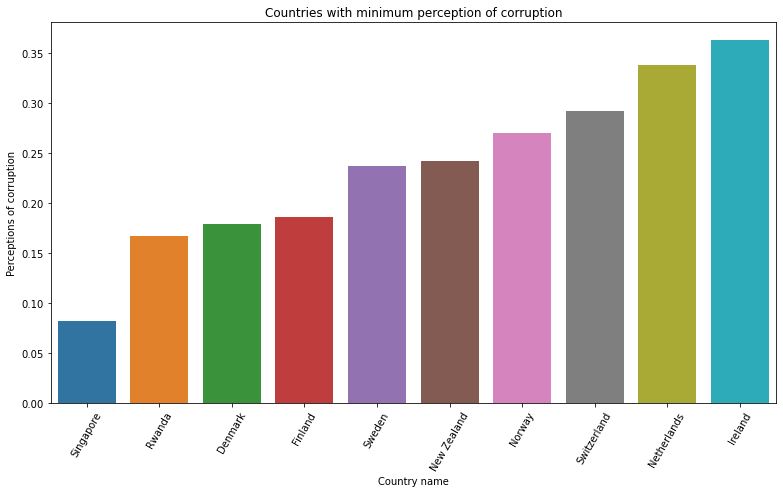

In [20]:
plt.figure(figsize=(13,7))
plt.title("Countries with minimum perception of corruption")
plt.xticks(rotation=60)
sns.barplot(x="Country name",y="Perceptions of corruption",data=df_least_corrupt)

### Happiness analysis of the report

#### Top 10 Happiest Countries 

In [21]:
df_happy = df.sort_values(by=["Happiness score"],ascending=False,ignore_index=True)[0:10]
df_happy["Country name"]

0        Finland
1        Denmark
2    Switzerland
3        Iceland
4    Netherlands
5         Norway
6         Sweden
7     Luxembourg
8    New Zealand
9        Austria
Name: Country name, dtype: object

<AxesSubplot:title={'center':'Most happiest countries Health life expectancy'}, xlabel='Country name', ylabel='Healthy life expectancy'>

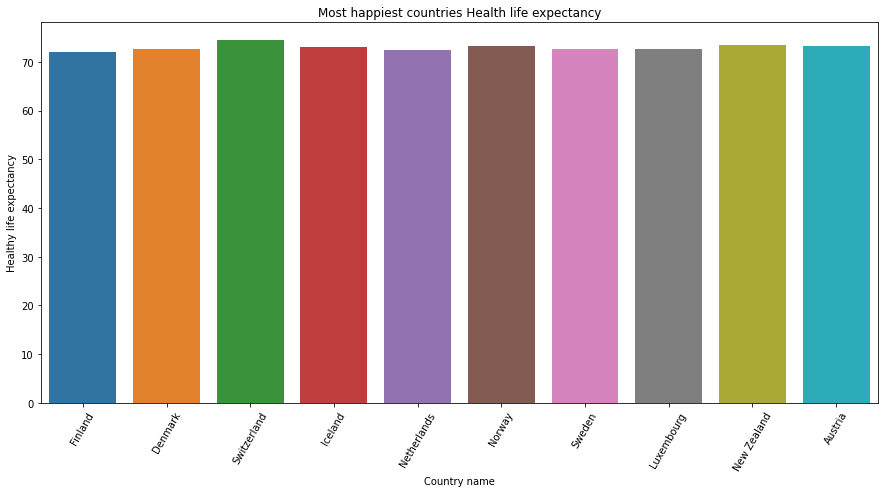

In [22]:
plt.figure(figsize=(15,7))
plt.title("Most happiest countries Health life expectancy")
plt.xticks(rotation=60)
sns.barplot(x="Country name",y="Healthy life expectancy",data=df_happy)

#### Top 10 least Happiest Countries

In [23]:
df_unhappy = df.sort_values(by=["Happiness score"],ignore_index=True)[0:10]
df_unhappy["Country name"]

0    Afghanistan
1       Zimbabwe
2         Rwanda
3       Botswana
4        Lesotho
5         Malawi
6          Haiti
7       Tanzania
8          Yemen
9        Burundi
Name: Country name, dtype: object

<AxesSubplot:title={'center':'Least happiest countries Health life expectancy'}, xlabel='Country name', ylabel='Healthy life expectancy'>

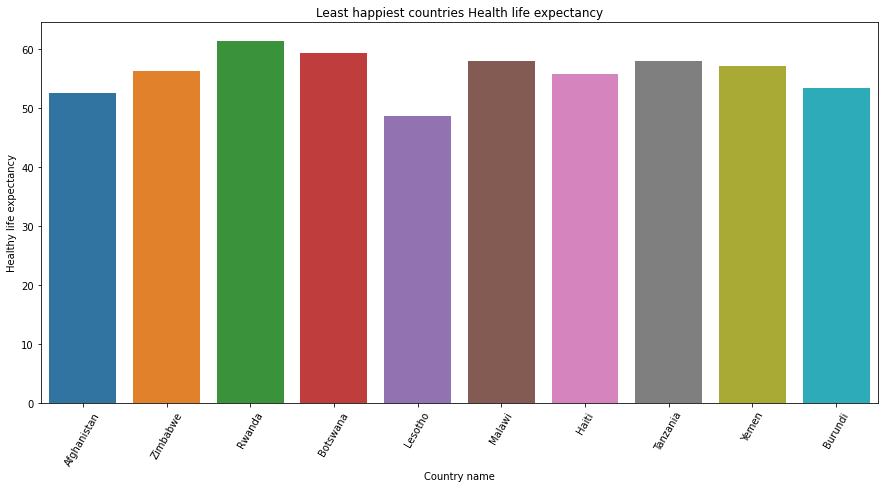

In [24]:
plt.figure(figsize=(15,7))
plt.title("Least happiest countries Health life expectancy")
plt.xticks(rotation=60)
sns.barplot(x="Country name",y="Healthy life expectancy",data=df_unhappy)

#### So, we can conclude that happiest countries lives 10-12 years more than unhappiest countries

#### .


### Relation between Corruption and Happiness

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Happiness score'>

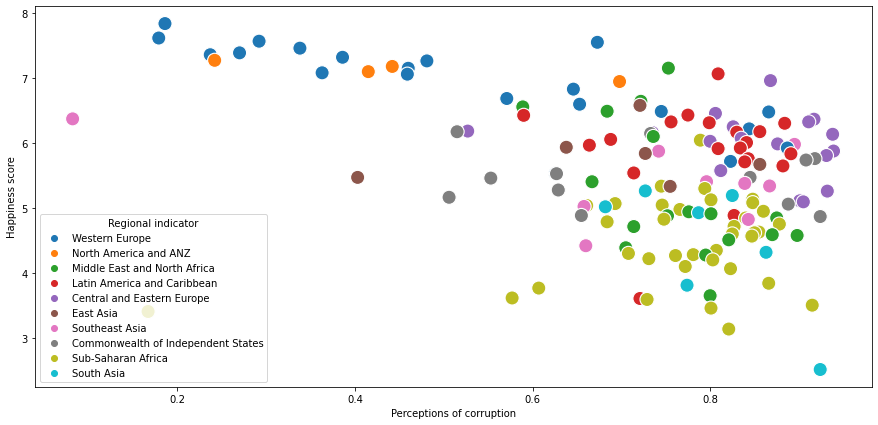

In [25]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="Perceptions of corruption",y="Happiness score",data=df,hue='Regional indicator',s=200)